# Introduction

This Heart Disease dataset sourced from Kaggle provides a valuable resource for understanding the factors influencing the likelihood of developing Coronary Heart Disease (CHD) within the next ten years. With features such as gender, age, education, currentSmoker, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, diaBP, BMI, heartRate, and glucose, the dataset encapsulates a diverse range of health-related variables. By applying machine learning techniques, predictions can be made regarding an individual's susceptibility to CHD, contributing to advancements in preventive healthcare strategies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart_disease_dataset.csv')

In [3]:
df.shape

(4240, 16)

In [4]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [6]:
#null values in data
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<Axes: >

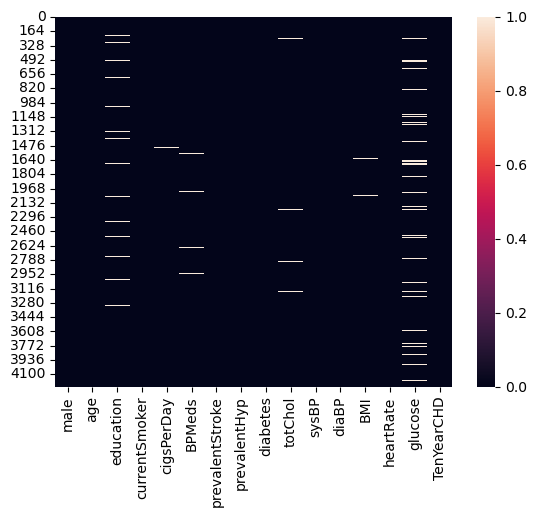

In [7]:
#heatmap displaying null values
sns.heatmap(df.isnull())

In [8]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [9]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [10]:
#filling the null values
df['education'] = df['education'].fillna(df['education'].mode()[0])

In [11]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())

In [12]:
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])

In [13]:
df['totChol'] = df['totChol'].fillna(df['totChol'].median())

In [14]:
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

In [15]:
df['glucose'] = df['glucose'].fillna(df['glucose'].median())

In [16]:
df = df.dropna(subset=['heartRate'])

In [17]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

<Axes: >

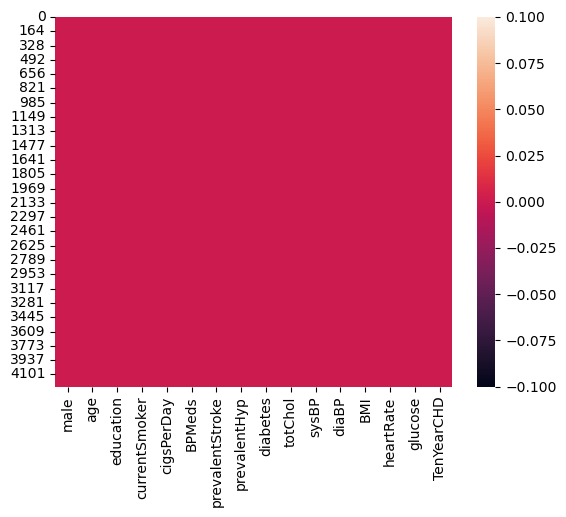

In [18]:
#heatmap after filling the null values
sns.heatmap(df.isnull())

<Axes: xlabel='TenYearCHD', ylabel='count'>

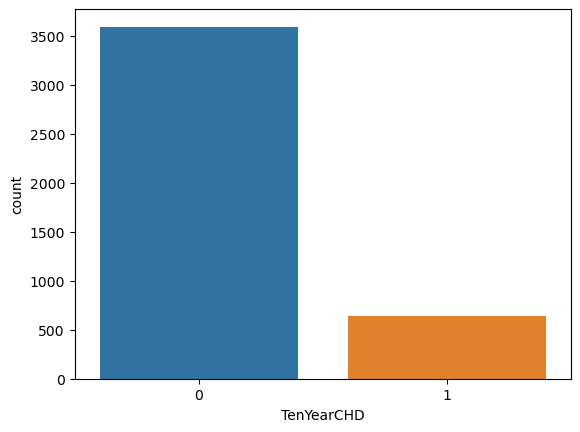

In [19]:
sns.countplot(df, x='TenYearCHD')

## Machine Learning Approach

In [20]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [21]:
df.shape

(4239, 16)

<Axes: >

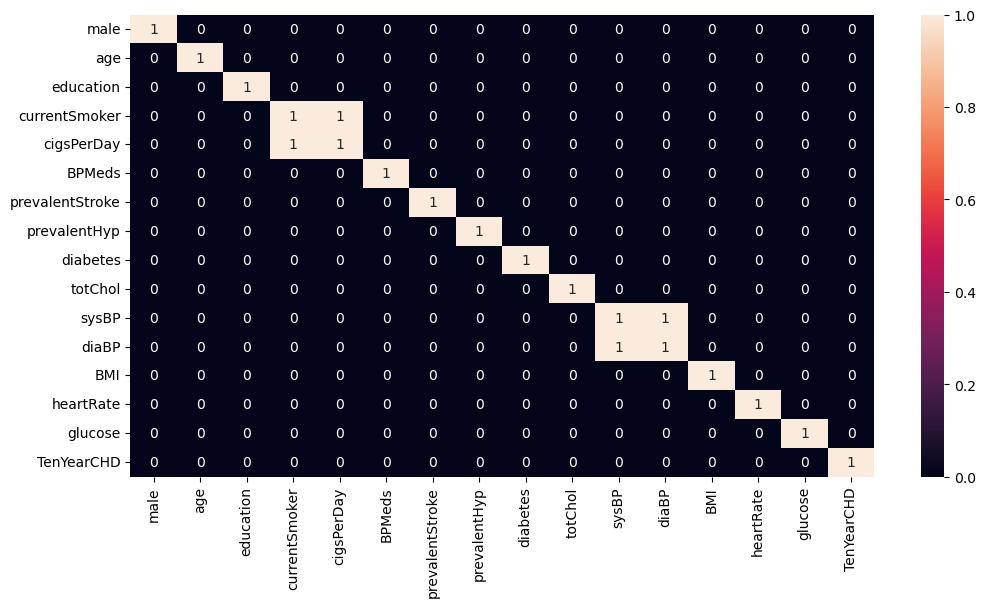

In [22]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr() > 0.7, annot=True)

In [23]:
X = df.loc[:, ['male', 'age', 'education', 'currentSmoker', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'diaBP', 'BMI', 'heartRate', 'glucose']]
Y = df.loc[:,'TenYearCHD']

In [24]:
X.head()

,male,age,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0,0,0,195.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0,0,0,250.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,0.0,0,0,0,245.0,80.0,25.34,75.0,70.0
3,0,61,3.0,1,0.0,0,1,0,225.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,0.0,0,0,0,285.0,84.0,23.10,85.0,85.0


In [25]:
Y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [26]:
#train test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2, random_state=42)

In [27]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((3391, 13), (848, 13), (3391,), (848,))

In [28]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [29]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =  GradientBoostingClassifier()

In [33]:
from sklearn.svm import SVC
svc = SVC()

In [34]:
for model in(lr,rfc,gbc,svc):
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    model_accuracy = accuracy_score(y_pred,Y_test)
    print(f'Accuracy score of {model} - {model_accuracy}\n')

Accuracy score of LogisticRegression() - 0.8443396226415094

Accuracy score of RandomForestClassifier() - 0.8419811320754716

Accuracy score of GradientBoostingClassifier() - 0.8384433962264151

Accuracy score of SVC() - 0.8431603773584906



## Hyperparameter Tuning

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
param_dist_lr = {
    'penalty': ['l1','l2'],
    'C' : [0.001,0.01,0.1,1,10,100],
    'solver' : ['liblinear','sag','saga','newton-cg','lbfgs'],
    'max_iter' : [100,500,1000],
    'class_weight' : [None,'balanced']
}

In [37]:
random_search_lr = RandomizedSearchCV(lr,param_distributions=param_dist_lr, n_iter=50,cv=5,scoring='accuracy')

In [38]:
random_search_lr.fit(X_train,Y_train)
best_param = random_search_lr.best_params_

In [39]:
print('Best Param - ', best_param)
print('Best Score - ', random_search_lr.best_score_)

Best Param -  {'solver': 'sag', 'penalty': 'l2', 'max_iter': 100, 'class_weight': None, 'C': 100}
Best Score -  0.852846672835725


In [40]:
param_dist_rfc = {
    'n_estimators' : [int(x) for x in np.linspace(start=50,stop=200,num=10)],
    'max_features' : ['sqrt','log2','auto'],
    'max_depth' : [int(x) for x in np.linspace(10,110,num=11)],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf' : [1,2,4],
    'bootstrap' : [True,False]
    }

In [41]:
random_search_rfc = RandomizedSearchCV(rfc,param_distributions=param_dist_rfc,cv=5,n_iter=50,scoring='accuracy',random_state=42)

In [42]:
random_search_rfc.fit(X_train,Y_train)
best_param = random_search_rfc.best_params_
best_score = random_search_rfc.best_score_

In [43]:
print('Best param - ', best_param)
print('Best score - ', best_score)

Best param -  {'n_estimators': 66, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}
Best score -  0.8519621515242353
